In [1]:
import numpy as np
import pickle
import torch
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
res_dict = {
    "NUTS": None,
    "Adapt i-SIR": None,
    "Ex2": None,
    "MALA": None,
    "i-SIR": None,
    "Flex2": None,
}

num_dict = {
    "NUTS": {"ess":[],"tv":[],"emd":[]},
    "Adapt i-SIR": {"ess":[],"tv":[],"emd":[]},
    "Ex2": {"ess":[],"tv":[],"emd":[]},
    "MALA": {"ess":[],"tv":[],"emd":[]},
    "i-SIR": {"ess":[],"tv":[],"emd":[]},
    "Flex2": {"ess":[],"tv":[],"emd":[]},
}

std_dict = {
    "NUTS": {"ess":[],"tv":[],"emd":[]},
    "Adapt i-SIR": {"ess":[],"tv":[],"emd":[]},
    "Ex2": {"ess":[],"tv":[],"emd":[]},
    "MALA": {"ess":[],"tv":[],"emd":[]},
    "i-SIR": {"ess":[],"tv":[],"emd":[]},
    "Flex2": {"ess":[],"tv":[],"emd":[]},
}


with open('res_funnel/res_nuts.pickle', 'rb') as handle:
    res_dict["NUTS"] = pickle.load(handle)
with open('res_funnel/adaptive_isir.pickle', 'rb') as handle:
    res_dict["Adapt i-SIR"] = pickle.load(handle)
with open('res_funnel/res_ex2.pickle', 'rb') as handle:
    res_dict["Ex2"] = pickle.load(handle)
#with open('res_funnel/res_mala.pickle', 'rb') as handle:
#    res_dict["MALA"] = pickle.load(handle)
with open('res_funnel/res_isir.pickle', 'rb') as handle:
    res_dict["i-SIR"] = pickle.load(handle)
with open('res_funnel/res_flex.pickle', 'rb') as handle:
    res_dict["Flex2"] = pickle.load(handle)

In [12]:
time_nuts = np.asarray(res_dict["NUTS"]["time"])
mean_time = []
std_time = []
for i in range(5):
    mean_time.append(time_nuts[i::5].mean())
    std_time.append(time_nuts[i::5].std())
print(mean_time)
print(std_time)

[33.40155521869659, 41.070420322418215, 61.620625553131106, 82.27686959266663, 88.45999939918518]
[8.229170778388305, 12.281228349588691, 30.163109632058696, 73.21123635551386, 59.56406476801612]


In [385]:
dims = [20,40,60,80,100]
#dims = [10,20,50,100,200]
major_xticks = dims

In [386]:
good_indices = list(set(np.arange(20)) - set([2,4,7]))
#print(np.asarray(res_adapt_isir["tv"]).flatten()[4::5][good_indices])
#good_indices = np.arange(50)

In [387]:
methods = ["NUTS","Flex2","Adapt i-SIR","Ex2","MALA"]#,"i-SIR"]
colors = ['g','r','y','b','m']#,'c']
keywords = ["ess","tv","emd"]

In [388]:
av_nuts = {"ess":[],"tv":[],"emd":[]}
av_isir = {"ess":[],"tv":[],"emd":[]}
av_adapt_isir = {"ess":[],"tv":[],"emd":[]}
av_flex = {"ess":[],"tv":[],"emd":[]}
av_ex2 = {"ess":[],"tv":[],"emd":[]}

In [389]:
for i in range(len(dims)):
    print("append")
    for method in methods:
        for key in keywords:
            num_dict[method][key].append(np.asarray(res_dict[method][key]).flatten()[i::5][good_indices].mean())
            std_dict[method][key].append(np.asarray(res_dict[method][key]).flatten()[i::5][good_indices].std())
#        av_nuts[key].append(np.asarray(res_nuts[key]).flatten()[i::5][good_indices].mean())
#        av_isir[key].append(np.asarray(res_mala[key]).flatten()[i::5][good_indices].mean())
#        av_adapt_isir[key].append(np.asarray(res_adapt_isir[key]).flatten()[i::5][good_indices].mean())
#        av_flex[key].append(np.asarray(res_flex[key]).flatten()[i::5][good_indices].mean())
#        av_ex2[key].append(np.asarray(res_ex2[key]).flatten()[i::5][good_indices].mean())

append
append
append
append
append


In [390]:
num_dict['NUTS']

{'ess': [0.3817033, 0.41256738, 0.4103158, 0.40322974, 0.40407884],
 'tv': [0.03438302, 0.033478457, 0.032189142, 0.03265308, 0.03219495],
 'emd': [122.7766385494329,
  417.0490109098171,
  769.3475629745077,
  1160.5519682619347,
  1562.5564748552758]}

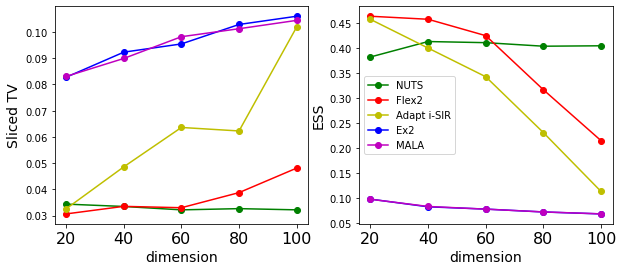

In [391]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
for ind in range(len(methods)):
    ax[0].plot(np.arange(len(dims)),np.asarray(num_dict[methods[ind]]["tv"]),marker="o",c=colors[ind],label=methods[ind])
    #ax[0].fill_between(
    #        np.arange(len(dims)),
    #        np.asarray(num_dict[methods[ind]]["tv"])-np.asarray(std_dict[methods[ind]]["tv"]),
    #        np.asarray(std_dict[methods[ind]]["tv"])+np.asarray(std_dict[methods[ind]]["tv"]),
    #        alpha=0.2,
    #        color = colors[ind]
    #   )
ax[0].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[0].set_xlabel('dimension',fontsize=14)
ax[0].set_ylabel('Sliced TV',fontsize=14)
#ex2-mcmc samples
for ind in range(len(methods)):
    ax[1].plot(np.arange(len(dims)),np.asarray(num_dict[methods[ind]]["ess"]),marker="o",c=colors[ind],label=methods[ind])
    #ax[1].fill_between(
    #        np.arange(len(dims)),
    #        np.asarray(num_dict[methods[ind]]["ess"])-np.asarray(std_dict[methods[ind]]["ess"]),
    #        np.asarray(std_dict[methods[ind]]["ess"])+np.asarray(std_dict[methods[ind]]["ess"]),
    #        alpha=0.2,
    #        color = colors[ind]
    #   )
ax[1].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[1].set_xlabel('dimension',fontsize=14)
ax[1].set_ylabel('ESS',fontsize=14)
ax[1].legend(fontsize = 10)
plt.savefig("new_banana/banana_ess_tv_study_new.png", format="png", bbox_inches="tight") 
plt.show()

In [346]:
std_dict[methods[3]]["tv"]

[0.008480467, 0.008964097, 0.011679731, 0.013815264, 0.0119900545]

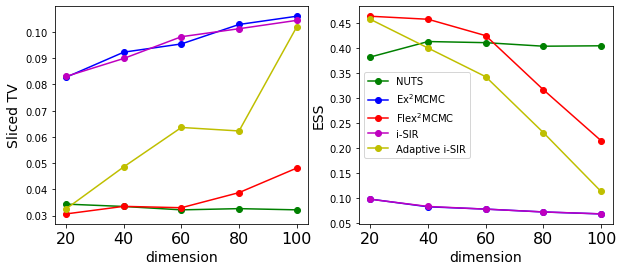

In [208]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
#i-sir plots
#ax[0].plot(np.arange(len(dims)),np.asarray(av_nuts["emd"])/np.asarray(dims),marker="o",c='g',label="NUTS")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_ex2["emd"])/np.asarray(dims),marker="o",c='b',label="Ex$^2$MCMC")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_flex["emd"])/np.asarray(dims),marker="o",c='r',label="Flex$^2$MCMC")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_isir["emd"])/np.asarray(dims),marker="o",c='m',label="MALA")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["emd"])/np.asarray(dims),marker="o",c='y',label="Adaptive i-SIR")

#ax[0].set_xlabel('dimension',fontsize=14)
#ax[0].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
#ax[0].set_ylabel('EMD',fontsize=14)
#mala samples
ax[0].plot(np.arange(len(dims)),np.asarray(av_nuts["tv"]),marker="o",c='g',label="NUTS")
ax[0].plot(np.arange(len(dims)),np.asarray(av_ex2["tv"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_flex["tv"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_isir["tv"]),marker="o",c='m',label="i-SIR")
ax[0].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["tv"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[1].fill_between(
#            dims,
#            np.amin(emd_isir/dims,axis=0),
#            np.amax(emd_isir/dims,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[1].fill_between(
#            dims,
#            np.amin(emd_ex2/dims,axis=0),
#            np.amax(emd_ex2/dims,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[1].set_title('EMD distance')
#ax[1].set_xticks(dims,fontsize=14)
ax[0].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[0].set_xlabel('dimension',fontsize=14)
ax[0].set_ylabel('Sliced TV',fontsize=14)
#ex2-mcmc samples
ax[1].plot(np.arange(len(dims)),np.asarray(av_nuts["ess"]),marker="o",c='g',label="NUTS")
ax[1].plot(np.arange(len(dims)),np.asarray(av_ex2["ess"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_flex["ess"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_isir["ess"]),marker="o",c='m',label="i-SIR")
ax[1].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["ess"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[2].fill_between(
#            dims,
#            np.amin(ess_isir,axis=0),
#            ess_isir.mean(axis=0) + ess_isir.mean(axis=0) - np.amin(ess_isir,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[2].fill_between(
#            dims,
#            np.amin(ess_ex2,axis=0),
#            ess_ex2.mean(axis=0) + ess_ex2.mean(axis=0) - np.amin(ess_ex2,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[2].set_title('EMD')
#ax[2].set_xticks(dims,fontsize=14)
ax[1].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[1].set_xlabel('dimension',fontsize=14)
ax[1].set_ylabel('ESS',fontsize=14)
ax[1].legend(fontsize = 10)
plt.savefig("banana/banana_ess_tv_study_new.png", format="png", bbox_inches="tight") 
plt.show()